<a href="https://colab.research.google.com/github/kulakovand/colabr_epo/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# импортируем TensorFlow и набор данных TensorFlow
import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)

# вспомогательные библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt

# Улучшим отображение прогрессбара
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

#tf.enable_eager_execution()

2.11.0


In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [6]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

def mirror(images, labels):
  return tf.image.flip_up_down(images), labels

# метод map применяет функцию нормализации к каждому элементу в массиве
# тестовых и тренировочных наборах данных
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize).map(mirror)

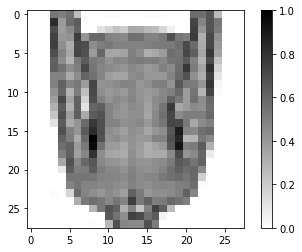

In [9]:
for image, label in test_dataset.take(1):
  break;
image = image.numpy().reshape((28, 28))

# отрисовываем изображение
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

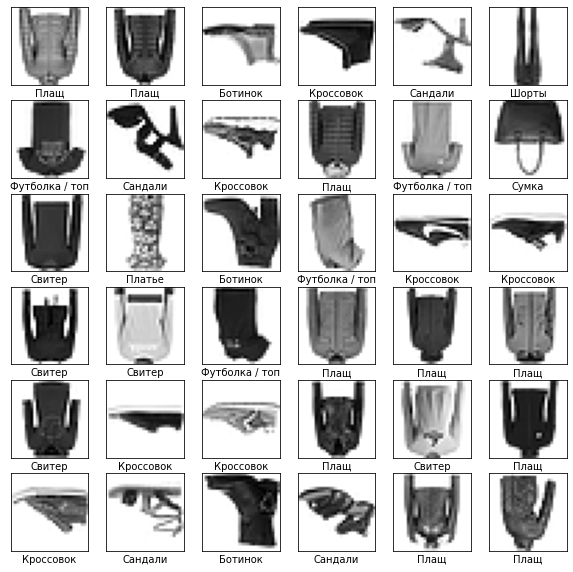

In [10]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(36):
  image = image.numpy().reshape((28,28))
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [14]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 25s 6ms/step - loss: 0.3883 - accuracy: 0.8601
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2548 - accuracy: 0.9055
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2087 - accuracy: 0.9237
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1798 - accuracy: 0.9340
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1558 - accuracy: 0.9424


In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Точность на тестовом наборе данных: ", test_accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 4.0575 - accuracy: 0.2398
Точность на тестовом наборе данных:  0.23980000615119934


In [18]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 324ms/step


In [19]:
predictions.shape

(32, 10)

In [20]:
predictions[0]

array([1.6178799e-01, 5.9819631e-06, 9.1561591e-03, 4.3371652e-05,
       1.1261328e-03, 1.1833230e-06, 7.6533002e-01, 2.2061585e-07,
       6.2541239e-02, 7.7731647e-06], dtype=float32)

In [21]:
np.argmax(predictions[0])

6